# **Проект: "Яндекс.Афиша"**
## **Автор: Андрей Подшивалов**
### **Дата: 03.06.2025**

## **Цель:**
Провести исследовательский анализ данных Яндекс.Афиши, чтобы выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.
## **Задачи:**
* Загрузка данных, знакомство с ними;
* Предобработка данных и подготовка их к исследованию;
* Оформление результатов по предобработке;
* Исследовательский анализ: проверка гипотез;
* Оформление результатов и рекомендаций.

## **Описание данных:**  

### final_tickets_orders_df:
* **`order_id`** — уникальный идентификатор заказа.
* **`user_id`** — уникальный идентификатор пользователя.
* **`created_dt_msk`** — дата создания заказа (московское время).
* **`created_ts_msk`** — дата и время создания заказа (московское время).
* **`event_id`** — идентификатор мероприятия из таблицы events.
* **`cinema_circuit`** — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
* **`age_limit`** — возрастное ограничение мероприятия.
* **`currency_code`** — валюта оплаты, например `rub` для российских рублей.
* **`device_type_canonical`** — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных;
* **`revenue`** — выручка от заказа.
* **`service_name`** — название билетного оператора.
* **`tickets_count`** — количество купленных билетов.
* **`total`** — общая сумма заказа.
* **`days_since_prev`** - количество дней с предыдущей покупки для каждого пользователя.

### final_tickets_events_df:
* **`event_id`** — уникальный идентификатор мероприятия.
* **`event_name`** — название мероприятия. Аналог поля event_name_code из исходной базы данных.
* **`event_type_description`** — описание типа мероприятия.
* **`event_type_main`** — основной тип мероприятия: театральная постановка, концерт и так далее.
* **`organizers`** — организаторы мероприятия.
* **`region_name`** — название региона.
* **`city_name`** — название города.
* **`venue_id`** — уникальный идентификатор площадки.
* **`venue_name`** — название площадки.
* **`venue_address`** — адрес площадки.

### final_tickets_tenge_df:
* **`nominal`** — номинал (100 тенге);
* **`data`** — дата;
* **`curs`** — курс тенге к рублю;
* **`cdx`** — обозначение валюты (`kzt`).

## **Часть 1:** Предобработка данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# Подгружаем датафреймы
try:
    final_tickets_events_df = pd.read_csv(r"C:\Users\Андрей\datasets\final_tickets_events_df.csv")
except:
    final_tickets_events_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')

try:
    final_tickets_orders_df = pd.read_csv(r"C:\Users\Андрей\datasets\final_tickets_orders_df.csv")
except:
    final_tickets_orders_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')


try:
    final_tickets_tenge_df = pd.read_csv(r"C:\Users\Андрей\datasets\final_tickets_tenge_df.csv")
except:
    final_tickets_tenge_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')


In [3]:
# Ивенты
display(final_tickets_events_df.head())
final_tickets_events_df.info()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [4]:
# Заказы
display(final_tickets_orders_df.head())
final_tickets_orders_df.info()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [5]:
# Заменим пропуски NaN в столбце `days_since_prev` на символическое значение -1, чтобы в случае чего, можно было их отфильтровать
final_tickets_orders_df['days_since_prev'] = final_tickets_orders_df['days_since_prev'].fillna(-1)

In [6]:
# Приведем столбцы с датами к типу date
final_tickets_orders_df['created_dt_msk'] = pd.to_datetime(final_tickets_orders_df['created_dt_msk'])
final_tickets_orders_df['created_ts_msk'] = pd.to_datetime(final_tickets_orders_df['created_ts_msk'])
# Столбец с количеством дней к типу int
final_tickets_orders_df['days_since_prev'] = final_tickets_orders_df['days_since_prev'].astype(int)

### **Проверка на пропуски и явные дубликаты**

In [7]:
# Данные по конвертации тенге в рубли
display(final_tickets_tenge_df.head())
final_tickets_tenge_df.info()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [8]:
# Приведем столбцы с датами к типу date
final_tickets_tenge_df['data'] = pd.to_datetime(final_tickets_tenge_df['data'])

In [9]:
# Проверим наличие дубликатов и пропусков в данных. По ТЗ их не должно быть нигде, кроме столбца days_since_prev
print(f'Дубликаты: \n{final_tickets_events_df.duplicated().sum()}\n')
print(f'Пропуски: \n{final_tickets_events_df.isna().sum()}')

Дубликаты: 
0

Пропуски: 
event_id                  0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64


In [10]:
print(f'Дубликаты: \n{final_tickets_orders_df.duplicated().sum()}\n')
print(f'Пропуски: \n{final_tickets_orders_df.isna().sum()}')

Дубликаты: 
0

Пропуски: 
order_id                 0
user_id                  0
created_dt_msk           0
created_ts_msk           0
event_id                 0
cinema_circuit           0
age_limit                0
currency_code            0
device_type_canonical    0
revenue                  0
service_name             0
tickets_count            0
total                    0
days_since_prev          0
dtype: int64


In [11]:
print(f'Дубликаты: \n{final_tickets_tenge_df.duplicated().sum()}\n')
print(f'Пропуски: \n{final_tickets_tenge_df.isna().sum()}')

Дубликаты: 
0

Пропуски: 
data       0
nominal    0
curs       0
cdx        0
dtype: int64


Данные представляют собой три таблицы: orders - информация о заказах, events - информация о мероприятиях, tenge - информация о курсе тенге к рублю.  

* Пропусков и явных дубликатов обнаружено не было, кроме столбца `days_since_prev` (они были заменены значением -1);
* Были заменены типы столбцов с датами с числового на `datetime`.
  
### **Теперь проверим данные на наличие ошибок.**

In [12]:
# Чтобы не писать однотипный код для каждого датафрейма, создадим функцию для вывода уникальных значений в категориальных столбцах
def cats(df):
    for col in df.select_dtypes(include='object').columns:
        print(f'Уникальные значения в столбце "{col}":')
        print(df[col].unique())
        print('-' * 50)

In [13]:
cats(final_tickets_orders_df)

Уникальные значения в столбце "user_id":
['0002849b70a3ce2' '0005ca5e93f2cf4' '000898990054619' ...
 'fffcd3dde79eb2c' 'fffeeb3c120cf0b' 'ffff00725179321']
--------------------------------------------------
Уникальные значения в столбце "cinema_circuit":
['нет' 'Другое' 'Киномакс' 'КиноСити' 'Москино' 'ЦентрФильм']
--------------------------------------------------
Уникальные значения в столбце "currency_code":
['rub' 'kzt']
--------------------------------------------------
Уникальные значения в столбце "device_type_canonical":
['mobile' 'desktop']
--------------------------------------------------
Уникальные значения в столбце "service_name":
['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'C

In [14]:
cats(final_tickets_events_df)

Уникальные значения в столбце "event_name":
['e4f26fba-da77-4c61-928a-6c3e434d793f'
 '5cc08a60-fdea-4186-9bb2-bffc3603fb77'
 '8e379a89-3a10-4811-ba06-ec22ebebe989' ...
 '196f51a8-344a-462a-b806-a8467fd0e5fa'
 '9283cb32-2750-43cd-b57e-dde9ccd5552e'
 'f4952452-27ff-4d03-9adb-f7836430f83b']
--------------------------------------------------
Уникальные значения в столбце "event_type_description":
['спектакль' 'балет' 'мюзикл' 'опера' 'концерт' 'шоу' 'ёлка'
 'цирковое шоу' 'событие' 'фестиваль' 'спортивное мероприятие' 'выставка'
 'спорт' 'оперетта' 'экскурсия' 'рок-мюзикл' 'музыкальный спектакль'
 'снегурочка' 'подарок' 'кукольный спектакль']
--------------------------------------------------
Уникальные значения в столбце "event_type_main":
['театр' 'концерты' 'ёлки' 'другое' 'стендап' 'выставки' 'спорт']
--------------------------------------------------
Уникальные значения в столбце "organizers":
['№4893' '№1931' '№4896' ... '№4817' '№5105' '№4552']
--------------------------------------

In [15]:
cats(final_tickets_tenge_df)

Уникальные значения в столбце "cdx":
['kzt']
--------------------------------------------------


#### В **категориальных переменных** проблем нет, теперь проверим **количественные**.

In [16]:
# Сперва разделим данные по валютам, чтобы не путать рубли и тенге
orders_rub = final_tickets_orders_df[final_tickets_orders_df['currency_code'] == 'rub'].copy()
orders_kzt = final_tickets_orders_df[final_tickets_orders_df['currency_code'] == 'kzt'].copy()

In [17]:
# Чтобы не писать однообразный код, сделаем функцию, в которой будет выводиться основная информаиция по распределению, гистограма и боксплот по столбцу
def num_info(df, col, currency):
    print(f'Анализ "{col}" для валюты {currency}')
    display(df[col].describe(percentiles=[0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]))

    plt.figure(figsize=(10, 10))

    # Гистограмма
    plt.subplot(2, 1, 1)
    df[col].hist(bins=50)
    plt.title(f'Гистограмма {col} ({currency})')
    plt.xlabel(col)
    plt.ylabel('Частота')

    # Боксплот
    plt.subplot(2, 1, 2)
    df.boxplot(column=col, vert=False)
    plt.title(f'Диаграмма размаха {col} ({currency})')

    plt.tight_layout()
    plt.show()

Анализ "revenue" для валюты rub


count    285780.000000
mean        547.568333
std         871.524559
min         -90.760000
1%            0.000000
5%           16.180000
25%         113.827500
50%         346.100000
75%         791.700000
95%        1606.500000
99%        2569.594200
max       81174.540000
Name: revenue, dtype: float64

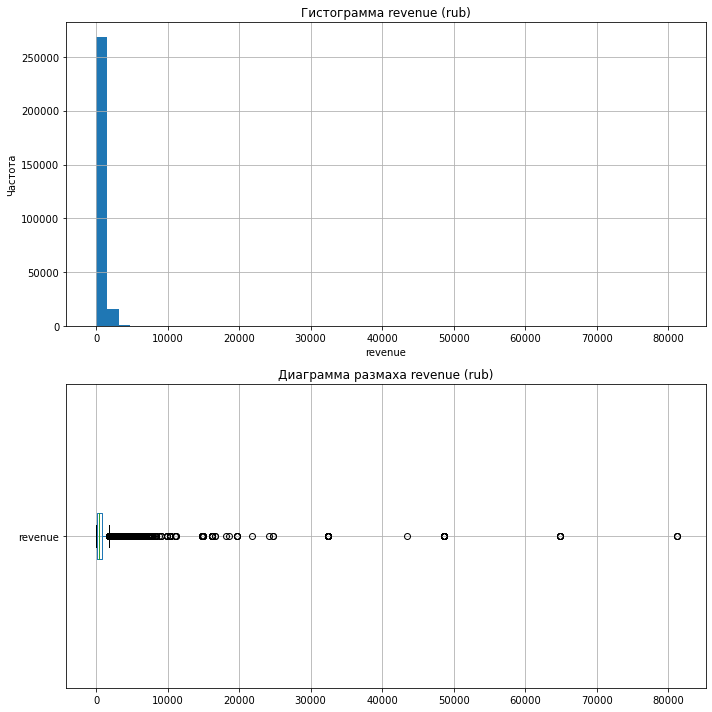

Анализ "tickets_count" для валюты rub


count    285780.000000
mean          2.754077
std           1.171419
min           1.000000
1%            1.000000
5%            1.000000
25%           2.000000
50%           3.000000
75%           4.000000
95%           5.000000
99%           6.000000
max          57.000000
Name: tickets_count, dtype: float64

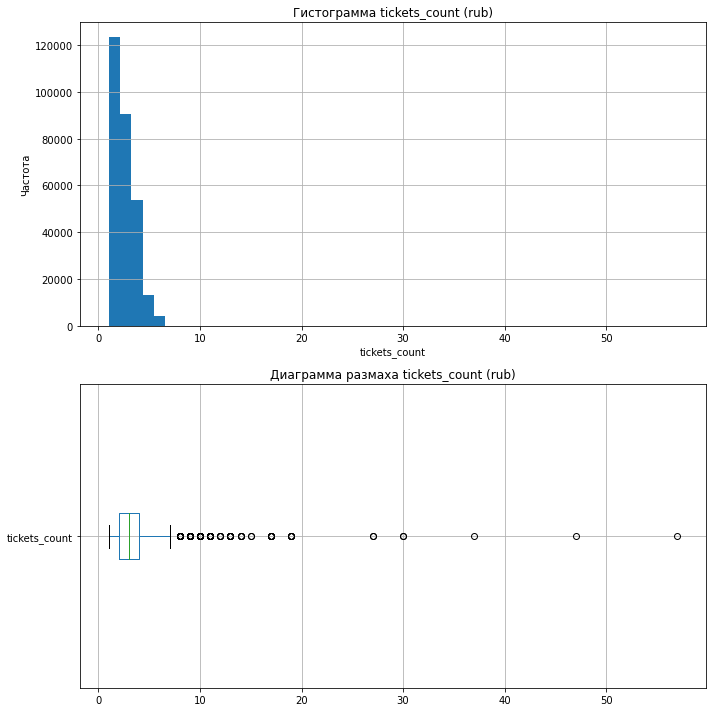

In [18]:
# Анализ в рублях
num_info(orders_rub, 'revenue', 'rub')
num_info(orders_rub, 'tickets_count', 'rub')

### Обзор данных по количеству билетов и выручке в рублях
* Гистограмма распределения **выручки** показывает, что медиана значительно смещена влево и присутствуют выбросы как в положительную сторону, так и вовсе в минус.  
Поэтому важно будет ограничить распределение между 1 и 99 процентилями;  

* В распределении **количества билетов** в заказе также присутствуют выбросы, причем их объем распределен крайне далеко справа от "усов" боксплота.  
Распределение по этой величине также стоит ограничить 99 процентилем.

Анализ "revenue" для валюты kzt


count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
1%          90.270000
5%         164.390000
25%        518.100000
50%       3698.830000
75%       7397.660000
95%      13784.260000
99%      17617.240000
max      26425.860000
Name: revenue, dtype: float64

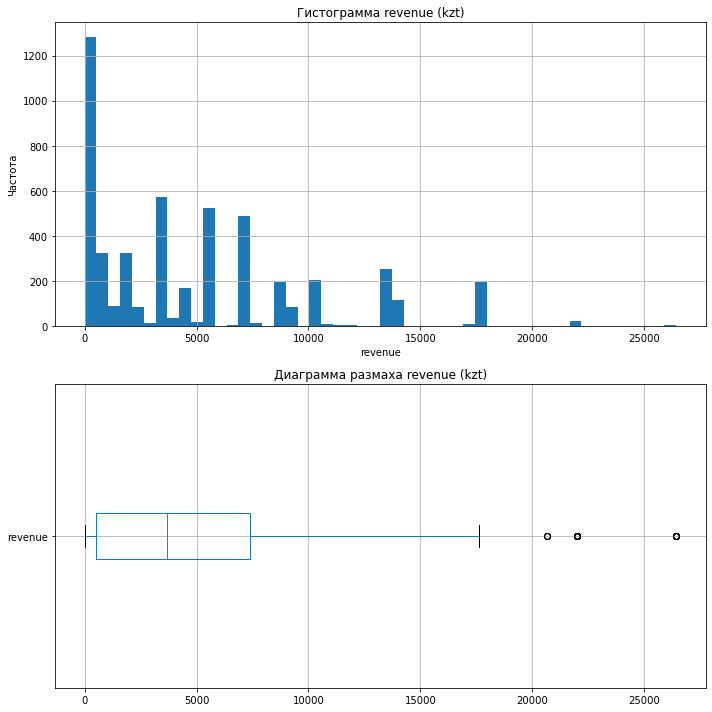

Анализ "tickets_count" для валюты kzt


count    5069.000000
mean        2.762872
std         1.115558
min         1.000000
1%          1.000000
5%          1.000000
25%         2.000000
50%         3.000000
75%         4.000000
95%         5.000000
99%         6.000000
max         6.000000
Name: tickets_count, dtype: float64

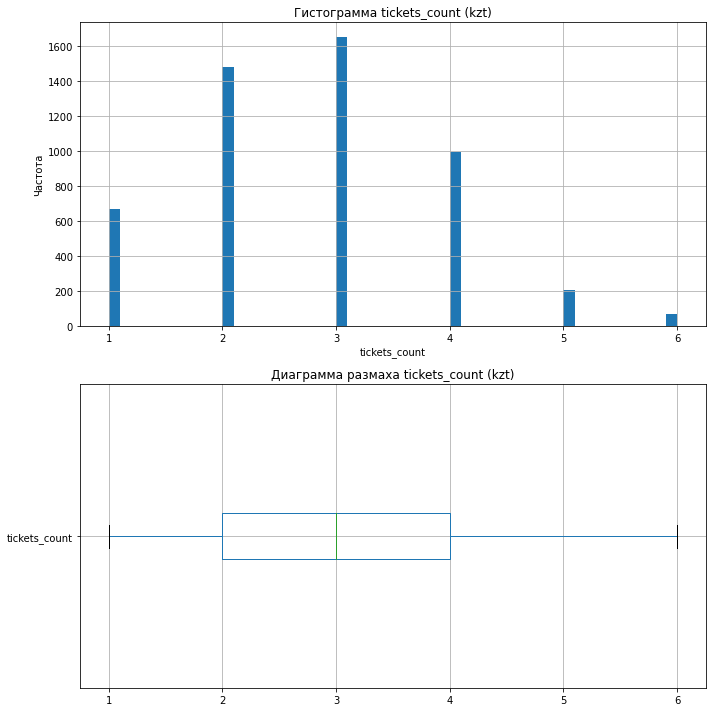

In [19]:
# Анализ по тенге
if not orders_kzt.empty:
    num_info(orders_kzt, 'revenue', 'kzt')
    num_info(orders_kzt, 'tickets_count', 'kzt')

### **Обзор распределений по выручке и количеству билетов для тенге**
* Здесь выбросы в **распределении выручки** хоть и присутствуют, распределение менее смещено влево, к тому же после конвертации тенге в рубли сумма значительно уменьшится, поэтому не будем отфильтровывать значения;
* В распределении **количества билетов** выбросы отсутствуют.

In [20]:
# Отфильтруем выбросы по количеству билетов
orders_rub_filtered = orders_rub[(orders_rub['revenue'] <= orders_rub['revenue'].quantile(0.99))&(orders_rub['revenue'].quantile(0.01) <= orders_rub['revenue'])]
print(f'Число заказов в рублях: {orders_rub_filtered.shape[0]} из {orders_rub.shape[0]}')

Число заказов в рублях: 282541 из 285780


In [21]:
# Рассчитаем долю срезанных данных после фильтрации выбросов по revenue в рублях
cut_count = orders_rub.shape[0] - orders_rub_filtered.shape[0]
cut_share = cut_count / orders_rub.shape[0]
print(f'Доля срезанных данных: {cut_share:.2%} ({cut_count} в абсолютном выражении)')

Доля срезанных данных: 1.13% (3239 в абсолютном выражении)


### **Теперь проверим наличие неявных дубликатов**  
В ТЗ подчеркнуто, что нужно провести проверку по бронированию билета без учёта идентификатора заказа (order_id).

In [22]:
dup = final_tickets_orders_df.duplicated(subset=[col for col in final_tickets_orders_df.columns if col != 'order_id'], keep=False)
dups_in_df = final_tickets_orders_df[dup]
print(f'Количество неявных дубликатов (без учёта order_id): {dups_in_df.shape[0]}')
display(dups_in_df.sort_values(by=[col for col in final_tickets_orders_df.columns if col != "order_id"]).head(15))

Количество неявных дубликатов (без учёта order_id): 58


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
11777,1123983,06eb7897f65b433,2024-08-13,2024-08-13 16:31:07,183706,нет,18,rub,mobile,69.82,Билеты в руки,1,997.48,0
11778,1123867,06eb7897f65b433,2024-08-13,2024-08-13 16:31:07,183706,нет,18,rub,mobile,69.82,Билеты в руки,1,997.48,0
57217,160922,2564e3703075008,2024-10-30,2024-10-30 10:04:15,589005,нет,6,rub,mobile,11.23,Лови билет!,2,280.81,0
57220,160893,2564e3703075008,2024-10-30,2024-10-30 10:04:15,589005,нет,6,rub,mobile,11.23,Лови билет!,2,280.81,0
84010,3363711,3ee7dc2e115847f,2024-06-25,2024-06-25 07:32:08,277504,нет,6,rub,mobile,59.19,Билеты в руки,3,739.85,0
84015,3363798,3ee7dc2e115847f,2024-06-25,2024-06-25 07:32:08,277504,нет,6,rub,mobile,59.19,Билеты в руки,3,739.85,0
148473,2324032,7b525118ae656af,2024-10-28,2024-10-28 08:33:04,588203,нет,0,rub,mobile,26.96,Лучшие билеты,4,674.12,0
148477,2323916,7b525118ae656af,2024-10-28,2024-10-28 08:33:04,588203,нет,0,rub,mobile,26.96,Лучшие билеты,4,674.12,0
154170,5372628,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,Билеты без проблем,1,3170.95,0
154173,5372831,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,Билеты без проблем,1,3170.95,0


Неявные дубликаты и правда присутствуют, отличаясь только по столбцу `order_id`.  
Целесообразно будет оставить первое значение по каждому дубликату в датафрейме, а остальные удалить.

In [23]:
final_tickets_orders_df = final_tickets_orders_df.drop_duplicates(subset=[col for col in final_tickets_orders_df.columns if col != 'order_id'], keep='first')

### **Объединение датафреймов**

In [24]:
df = pd.merge(final_tickets_orders_df, final_tickets_events_df, on='event_id', how='inner')
df = pd.merge(df, final_tickets_tenge_df, left_on='created_dt_msk', right_on='data', how='inner')

In [25]:
display(df.head())
print(df.info())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt
1,6274963,44c1c640a242aea,2024-08-20,2024-08-20 22:12:04,237325,нет,0,rub,mobile,144.73,...,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-08-20,100,18.6972,kzt
2,474528,2b1f730d7024681,2024-08-20,2024-08-20 15:29:56,373657,нет,18,rub,mobile,318.27,...,Североярская область,Озёрск,2,1631,"Музей истории ""Воспоминание"" Групп","наб. Тамбовская, д. 1/4 к. 577",2024-08-20,100,18.6972,kzt
3,7477361,05ba93f1b1e1fdd,2024-08-20,2024-08-20 17:06:44,534657,нет,16,rub,mobile,339.61,...,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",2024-08-20,100,18.6972,kzt
4,472150,3ee7dc2e115847f,2024-08-20,2024-08-20 02:57:22,534657,нет,16,rub,mobile,339.61,...,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",2024-08-20,100,18.6972,kzt


<class 'pandas.core.frame.DataFrame'>
Int64Index: 290581 entries, 0 to 290580
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290581 non-null  int64         
 1   user_id                 290581 non-null  object        
 2   created_dt_msk          290581 non-null  datetime64[ns]
 3   created_ts_msk          290581 non-null  datetime64[ns]
 4   event_id                290581 non-null  int64         
 5   cinema_circuit          290581 non-null  object        
 6   age_limit               290581 non-null  int64         
 7   currency_code           290581 non-null  object        
 8   device_type_canonical   290581 non-null  object        
 9   revenue                 290581 non-null  float64       
 10  service_name            290581 non-null  object        
 11  tickets_count           290581 non-null  int64         
 12  total                   290581

До объединения в датафрейме `events` было 22427 строк, а в датафрейме `orders` - 290849. После очистки неявных дубликатов и объединения по `event_id`, количество строк в готовом датафрейме сократилось до 290581. К нему же был присоединен датафрейм с данными по курсу тенге к рублю по столбцу `data`.

### **Новые столбцы**
В ТЗ было указано, что нужно создать несколько новых столбцов:
* **`revenue_rub`** - выручка с заказа в единой валюте — российский рубль;
* **`one_ticket_revenue_rub`** - выручка с продажи одного билета на мероприятие;
* **`month`** - месяц оформления заказа;
* **`season`** - столбец с информацией о сезонности, включая такие категории, как: `'лето'`, `'осень'`, `'зима'`, `'весна'`;


In [26]:
# Напишем цикл с перебором по индексам, чтобы перевести все доходы в рубли
revenue_rub = []
# Переводим все доходы в рубли
for i in range(len(df['currency_code'])):
    if df['currency_code'][i] == 'kzt':
        revenue_rub.append(df['revenue'][i]/df['nominal'][i] * df['curs'][i])
    elif df['currency_code'][i] == 'rub':
        revenue_rub.append(df['revenue'][i])
df['revenue_rub'] = revenue_rub

In [27]:
# теперь уберем ненужные столбцы, чтобы не загромождать датафрейм
df = df.drop(columns=['currency_code', 'nominal', 'curs', 'data'])

In [28]:
# Посчитаем доход от одного билета
df['one_ticket_revenue_rub'] = df['revenue'] / df['tickets_count']
df['one_ticket_revenue_rub'].head()

0    380.485
1    144.730
2    106.090
3    339.610
4    339.610
Name: one_ticket_revenue_rub, dtype: float64

In [29]:
# Извлекаем месяц из даты создания заказа
df['month'] = df['created_dt_msk'].dt.month

In [30]:
# Тут лучше всего использовать map для замены значений в столбце, чтобы не нагружать код циклами, так будет быстрее

# Словарь с соответствием месяцев и сезонов
season = {
    12: 'зима', 1: 'зима', 2: 'зима', 3: 'весна',
    4: 'весна', 5: 'весна', 6: 'лето',
    7: 'лето', 8: 'лето', 9: 'осень',
    10: 'осень', 11: 'осень'
}

df['season'] = df['month'].map(season)

In [31]:
# Посмотрим новые столбцы и соответствие их данным
display(df[['created_dt_msk', 'month', 'season', 'revenue_rub', 'one_ticket_revenue_rub']].head())

,created_dt_msk,month,season,revenue_rub,one_ticket_revenue_rub
0,2024-08-20,8,лето,1521.94,380.485
1,2024-08-20,8,лето,144.73,144.730
2,2024-08-20,8,лето,318.27,106.090
3,2024-08-20,8,лето,339.61,339.610
4,2024-08-20,8,лето,339.61,339.610


## **Обзор проделанной работы по части 1:**
* Данные очищены от неявных дубликатов;
* Столбцы приведены к нужным форматам;
* Датафреймы объединены в один - **`df`**;
* Добавлены новые столбцы: `month`,  `season`, `revenue_rub`, `one_ticket_revenue_rub`;  
* Доля отфильтрованных данных в рамках единого датафрейма составила 1.13% (3239 в абсолютном выражении);
  

### **Общий вывод по части 1:**
Данные предобработаны и готовы к исследовательскому анализу.

# **Часть 2: Исследовательский анализ данных**

## **Постановка задачи:**
Коллеги из продуктового отдела сервиса **Яндекс.Афиша** заметили общее изменение в пользовательском спросе. Причины этого пока неясны.   
* Сработал фактор сезонности, и пользователи поменяли предпочтения? 
* Или изменилась аудитория? 
* Какие события стали привлекать больше зрителей, какие организаторы и площадки выбились в лидеры? 
* Отличаются ли своей активностью пользователи мобильных устройств от клиентов, которые бронируют билеты со стационарного компьютера?

## **Задача 3.1. Анализ распределения заказов по сегментам и их сезонные изменения**

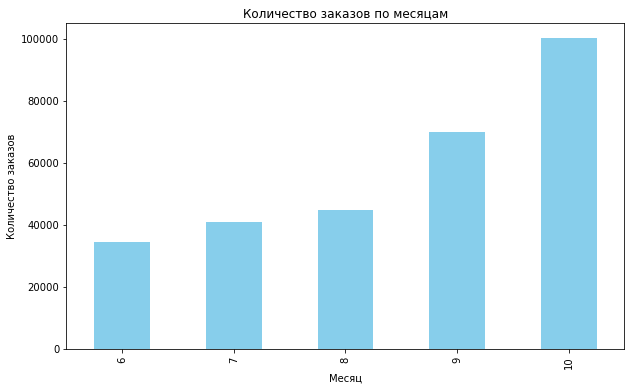

In [32]:
# Для начала проверим, присутствует ли увеличение заказов от июня к ноябрю
orders_by_month = df.groupby('month')['order_id'].nunique()

plt.figure(figsize=(10, 6))
orders_by_month.plot(kind='bar', color='skyblue')

plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')

plt.show()

**Да, предположение подтвердилось** - наблюдается стабильный рост количества заказов с июня по октябрь:  
если в июне количество уникальных заказов составляло менее 40 тысяч, то в октябре их число пробило отметку в 100 тысяч за месяц.

In [33]:
# Для построения распределений по сезонам фильтруем данные по лету и осени
df_season = df[df['season'].isin(['лето', 'осень'])]

In [34]:
# Чтобы не писать однообразный код, сделаем функцию для визуализации по долям
def share_by_category(df, season_col, category_col, title):
    # Группируем по сезону и категории
    counts = df.groupby([season_col, category_col])['order_id'].nunique().reset_index()

    # Считаем доли
    total = counts.groupby(season_col)['order_id'].transform('sum')
    counts['share'] = counts['order_id'] / total

    # Теперь по сводке построим график
    pivot = counts.pivot(index=season_col, columns=category_col, values='share')

    pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.title(title)
    plt.ylabel('Доля заказов')
    plt.xlabel(category_col)
    plt.xticks(rotation=0)

    plt.show()


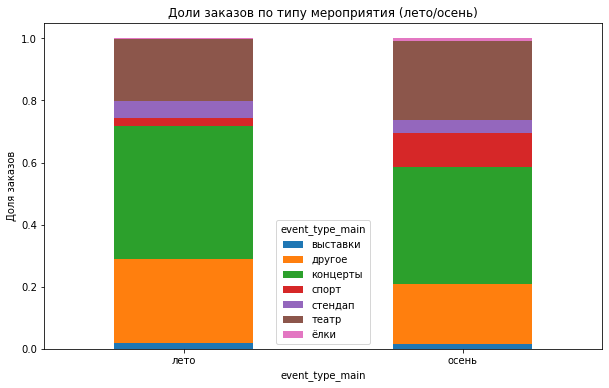

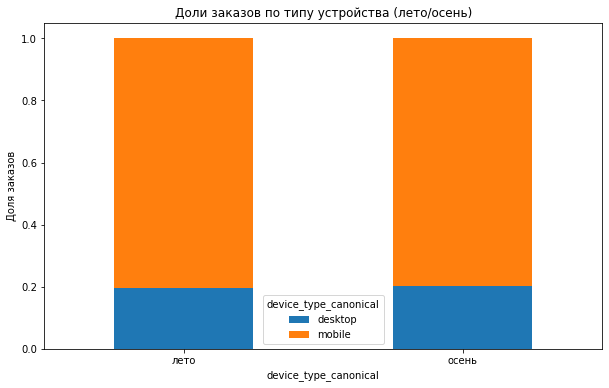

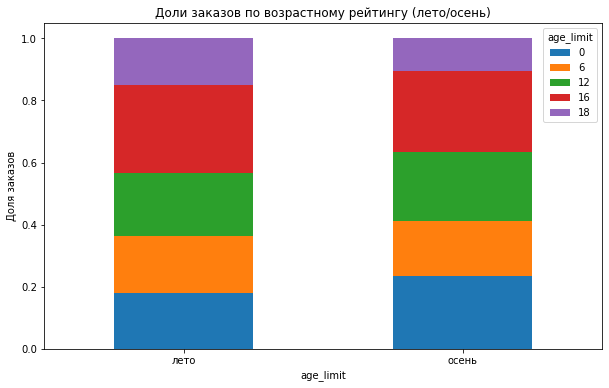

In [35]:
# Тип мероприятия
share_by_category(df_season, 'season', 'event_type_main', 'Доли заказов по типу мероприятия (лето/осень)')

# Тип устройства
share_by_category(df_season, 'season', 'device_type_canonical', 'Доли заказов по типу устройства (лето/осень)')

# По возрастному рейтингу
share_by_category(df_season, 'season', 'age_limit', 'Доли заказов по возрастному рейтингу (лето/осень)')

### **Промежуточные выводы**
* В разрезе **типов мероприятия** категории `другое`, `выставки`, `концерты` и `стендап` популярнее летом, однако `театр` и особенно `спорт значительно популярнее осенью`;
* Доля заказов с **десктопа (компьютеров)** как летом, так и осенью, сохраняется в районе 18-20%, **заказы с мобильных устройств лидируют в обоих сезонах**;
* Доля по возрастному рейтингу же разнится: постановки категории `0+` **популярнее осенью** более чем на **5%**, также в осенний сезон популярнее постановки `12+` - примерно на **2%**,  однако остальные категории: `6+`, `16+` и `18+` популярнее летом.  
Причем наибольшая разница видна в категории `18+` (для взрослых) - летом билеты из этой категории популярнее примерно на **5%**.  
Такое поведение показателя может быть связано с **периодом летних отпусков**.

In [36]:
# Здесь применим тот же код, что и из функции сверху, но будем считать не количетво заказов, а среднюю выручку от одного билета
one_tick_seasons = df.groupby(['season', 'event_type_main'])['one_ticket_revenue_rub'].mean().reset_index()

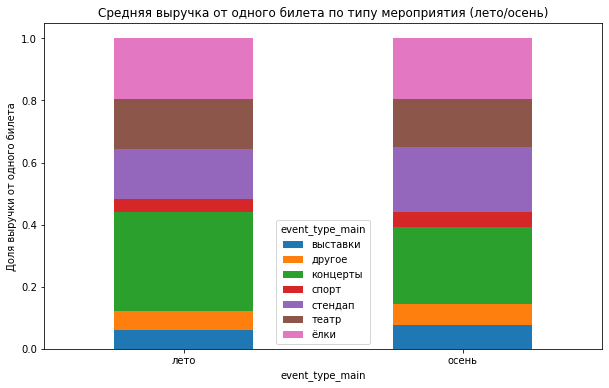

In [37]:
# Считаем доли
total = one_tick_seasons.groupby('season')['one_ticket_revenue_rub'].transform('sum')
one_tick_seasons['share'] = one_tick_seasons['one_ticket_revenue_rub'] / total

# Теперь по сводке построим график
pivot = one_tick_seasons.pivot(index='season', columns='event_type_main', values='share')
pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Средняя выручка от одного билета по типу мероприятия (лето/осень)')
plt.ylabel('Доля выручки от одного билета')
plt.xlabel('event_type_main')
plt.xticks(rotation=0)

plt.show()

### **Промежуточные выводы:**
* Доля выручки от одного билета в большей степени разнится в категориях `стендап` и `концерты`: **в среднем на один билет на концерт тратится больше денег летом**, а **на стендап - осенью**;
* В категории `спорт` доля выручки в зависимости от сезона **практически не отличается**, несмотря на достаточно **большую разницу в количестве заказов**: осенью их больше в несколько раз, чем летом; 

## **Задача  3.2. Осенняя активность пользователей**

### **Постановка задачи**
Изучим **активность пользователей осенью 2024 года**. В нашем распоряжении данные за два осенних месяца. Используем только эти данные.
#### **Что нужно сделать?**
Проанализируем динамику изменений по дням для:

* общего числа заказов;
* количества активных пользователей `DAU`;
* среднего числа заказов на одного пользователя;
* средней стоимости одного билета.

### **Рекомендации от заказчика:**  
* Удобно создать **одну сводную таблицу**, и в ней по дням рассчитать **число заказов** и **число уникальных пользователей**, а затем найти величину — **количество заказов на одного пользователя**. Полученные результаты можно визуализировать с помощью **линейного графика**. Подобные графики вы строили на дашборде, только делали это с агрегацией по неделям.  
* Изучите недельную цикличность. Выделите день недели и сравните пользовательскую активность **в будни и выходные**.  
* Напишите промежуточный вывод о пользовательской активности и недельной цикличности.

In [38]:
# Фильтруем датафрейм, чтобы остались только данные по осени
df_autumn = df[df['season'] == 'осень']

In [39]:
# Сперва сгруппируем данные по дням, а потом создадим сводную таблицу
orders_by_day = df_autumn.groupby('created_dt_msk')['order_id'].nunique().reset_index()
dau = df_autumn.groupby('created_dt_msk')['user_id'].nunique().reset_index()
avg_orders_per_user = orders_by_day['order_id'] / dau['user_id']
avg_ticket_cost = df_autumn.groupby('created_dt_msk')['one_ticket_revenue_rub'].mean().reset_index()

pivot_autumn = pd.DataFrame({
    'created_dt_msk': orders_by_day['created_dt_msk'],
    'orders_count': orders_by_day['order_id'],
    'dau': dau['user_id'],
    'avg_orders_per_user': avg_orders_per_user,
    'avg_ticket_cost': avg_ticket_cost['one_ticket_revenue_rub']
})
pivot_autumn.head()

,created_dt_msk,orders_count,dau,avg_orders_per_user,avg_ticket_cost
0,2024-09-01,1348,569,2.369069,210.853196
1,2024-09-02,1391,580,2.398276,215.066341
2,2024-09-03,5124,783,6.544061,87.524934
3,2024-09-04,1784,688,2.593023,209.318615
4,2024-09-05,1960,745,2.630872,220.189434


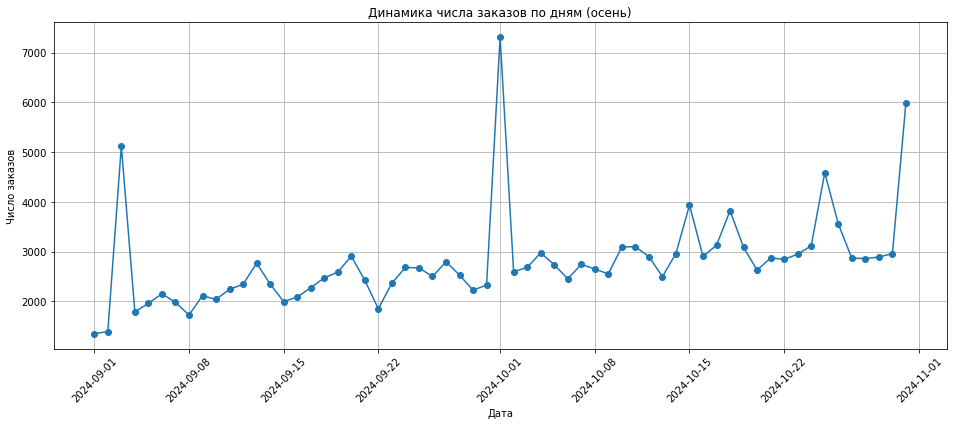

In [40]:
# Число заказов
plt.figure(figsize=(16, 6))

plt.plot(pivot_autumn['created_dt_msk'], pivot_autumn['orders_count'], marker='o')

plt.title('Динамика числа заказов по дням (осень)')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Число заказов')

plt.grid(True)
plt.show()


Пиковые дни: 3 сентября и 1 октября, а также 31 октября - более 5000 заказов за день. Общая динамика демонстрирует небольшой рост за 2 месяца.

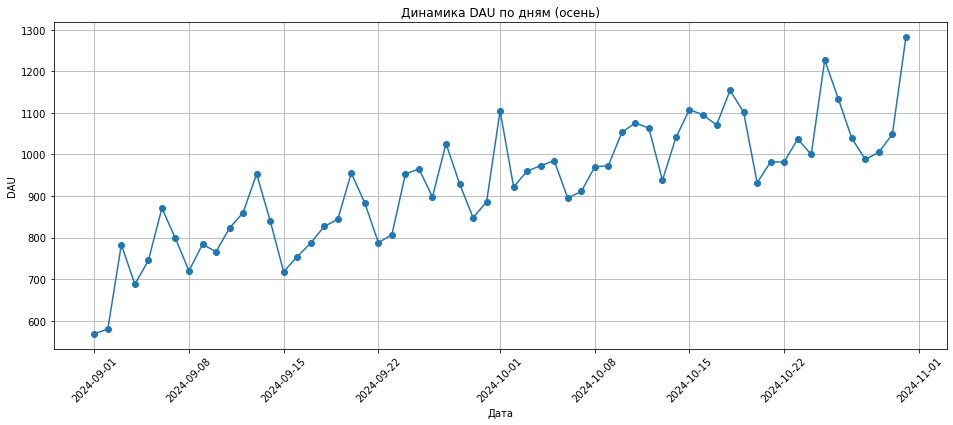

In [41]:
# DAU
plt.figure(figsize=(16, 6))

plt.plot(pivot_autumn['created_dt_msk'], pivot_autumn['dau'], marker='o')

plt.title('Динамика DAU по дням (осень)')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('DAU')
plt.grid(True)

plt.show()


DAU стабильно растет, однако видна недельная динамика: в некоторые дни недели активных юзеров больше, к концу недели метрика идет на спад. Однако общий тренд - увеличение DAU.

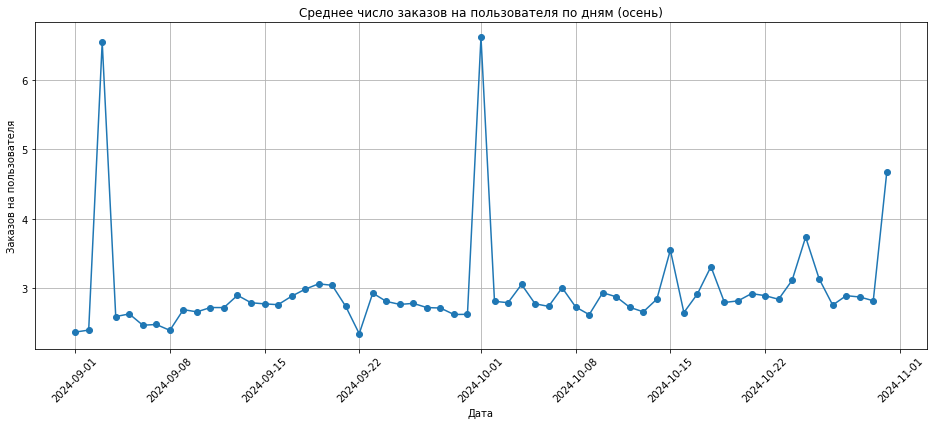

In [42]:
# Среднее число заказов на пользователя
plt.figure(figsize=(16, 6))

plt.plot(pivot_autumn['created_dt_msk'], pivot_autumn['avg_orders_per_user'], marker='o')

plt.title('Среднее число заказов на пользователя по дням (осень)')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Заказов на пользователя')
plt.grid(True)

plt.show()

Наибольшее среднее количество заказов на пользователя наблюдается в те же даты (более 6 заказов на человека).

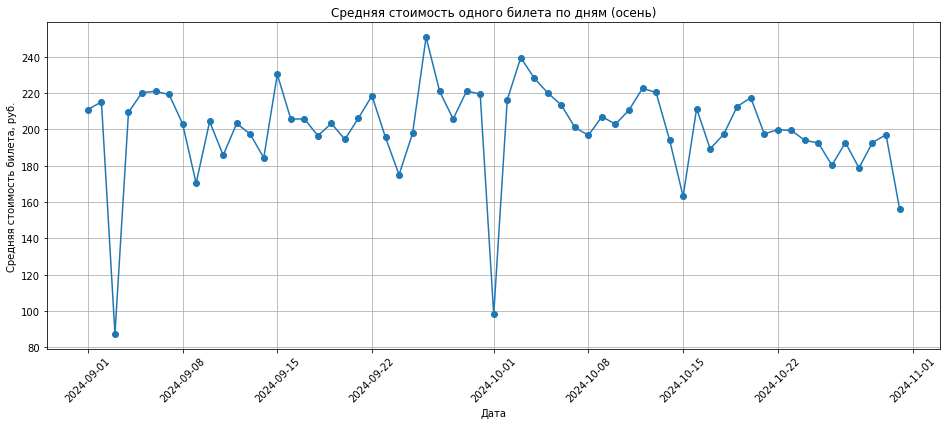

In [43]:
# Средняя стоимость одного билета
plt.figure(figsize=(16, 6))

plt.plot(pivot_autumn['created_dt_msk'], pivot_autumn['avg_ticket_cost'], marker='o')

plt.title('Средняя стоимость одного билета по дням (осень)')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Средняя стоимость билета, руб.')
plt.grid(True)

plt.show()

На графике видны два огромных провала в средней стоимости билета в те же дни - 3 сентября и 1 октября.

In [44]:
# Выделим дни недели и праздников, чтобы посмотреть их динамику
pivot_autumn['day_of_week'] = pivot_autumn['created_dt_msk'].dt.day_name()
display(pivot_autumn.head())
# Сделаем сводку по дням недели
pivot_week = pivot_autumn.groupby('day_of_week').agg({'orders_count': 'sum','dau': 'sum','avg_orders_per_user': 'mean','avg_ticket_cost': 'mean'}).reset_index()


,created_dt_msk,orders_count,dau,avg_orders_per_user,avg_ticket_cost,day_of_week
0,2024-09-01,1348,569,2.369069,210.853196,Sunday
1,2024-09-02,1391,580,2.398276,215.066341,Monday
2,2024-09-03,5124,783,6.544061,87.524934,Tuesday
3,2024-09-04,1784,688,2.593023,209.318615,Wednesday
4,2024-09-05,1960,745,2.630872,220.189434,Thursday


In [45]:
# Будни
pivot_weekdays = pivot_week[~pivot_week['day_of_week'].isin(['Saturday', 'Sunday'])]
pivot_weekdays.sort_values(by='orders_count', ascending=False)

,day_of_week,orders_count,dau,avg_orders_per_user,avg_ticket_cost
5,Tuesday,31736,8459,3.729664,169.199312
4,Thursday,27391,8713,3.070646,206.547537
0,Friday,25088,8235,3.014298,207.723458
6,Wednesday,23118,8379,2.757496,202.235160
1,Monday,21707,7733,2.786572,197.458654


In [46]:
# Выходные
pivot_weekends = pivot_week[pivot_week['day_of_week'].isin(['Saturday', 'Sunday'])]
pivot_weekends.sort_values(by='orders_count', ascending=False)

,day_of_week,orders_count,dau,avg_orders_per_user,avg_ticket_cost
2,Saturday,21541,7736,2.770099,206.305212
3,Sunday,19579,7447,2.609567,214.130797


In [47]:
# Дополнительно посмотрим на 10 октября, так как в этот день большой всплеск заказов
pivot_autumn[pivot_autumn['created_dt_msk'] == '2024-10-01']

,created_dt_msk,orders_count,dau,avg_orders_per_user,avg_ticket_cost,day_of_week
30,2024-10-01,7310,1105,6.615385,98.135197,Tuesday


### **Промежуточные выводы:**
* В динамике **общего числа заказов** и **среднего числа заказов на человека** прослеживается **общая тенденция** - два гигантских скачка: **3 сентября** и **1 октября**;
* Обратная динамика видна в графике **средней стоимости билета**: в пиковые дни по количеству заказов находятся **самые низкие точки** на графике: 
чуть больше **80 рублей - 3 сентября**, и чуть меньше **100 рублей - 1 октября**. Между этими фактами потенциально может быть **корелляция**.  
Также стоит учесть, что обе даты - **вторники**, а также, что в абсолютных значениях за весь период по вторникам больше всего заказов (в рамках будних дней);
* Динамика `DAU` демонстрирует довольно устойчивый рост, однако присутствуют значительные **пики (скачки)** в разрезе недельной динамики - в основном они выпадают на **пятницы**;
* Стоит учесть, что **вторники и пятницы** - **всплески** по `DAU`, а **воскресения** - зачастую **наоборот**.

## **Задача 3.3. Популярные события и партнёры**

### **Постановка задачи**
Посмотрим, как **события** распределены **по регионам и партнёрам**. Это позволит выделить ключевые регионы и партнёров, которые вносят **наибольший вклад в выручку**.
* Для каждого региона посчитаем **уникальное количество мероприятий** и **общее число заказов**. Определим, в каких регионах предлагается наибольшее разнообразие мероприятий.
* Для каждого билетного партнёра посчитайте общее число **уникальных мероприятий**, **обработанных заказов** и **суммарную выручку** с заказов билетов. Нужно сделать акцент на наиболее активных партнёрах.
### **Рекомендации от заказчика:** 
* Исследуйте не только абсолютные значения, но и **доли**. Например, для каждого региона посчитайте **долю проводимых мероприятий** от их общего числа или **долю заказов в регионе** от **общего числа заказов**.
В конце напишите промежуточный вывод, проанализируйте не только топ-категории, но и общее распределение данных между категориями. Существуют ли **явные лидеры** среди регионов и партнёров?

In [48]:
# Сделаем сводную таблицу по регионам, чтобы посмотреть, как распределяются заказы и события по регионам
orders_by_region = df.groupby('region_name')['order_id'].nunique().reset_index()
events_by_region = df.groupby('region_name')['event_id'].nunique().reset_index()

pivot_region = pd.DataFrame({
    'region_name': orders_by_region['region_name'],
    'orders_by_region': orders_by_region['order_id'],
    'events_by_region': events_by_region['event_id']

})

# Теперь посчитаем общее число заказов и событий
total_orders = pivot_region['orders_by_region'].sum()
total_events = pivot_region['events_by_region'].sum()

# Добавим доли в таблицу
pivot_region['orders_share'] = pivot_region['orders_by_region'] / total_orders
pivot_region['events_share'] = pivot_region['events_by_region'] / total_events
pivot_region.head(10)

pivot_region = pivot_region.sort_values(by='orders_by_region', ascending=False).reset_index(drop=True)
pivot_region.head(10)

,region_name,orders_by_region,events_by_region,orders_share,events_share
0,Каменевский регион,91049,5983,0.313334,0.266777
1,Североярская область,44043,3814,0.151569,0.170063
2,Широковская область,16457,1233,0.056635,0.054978
3,Медовская область,13898,504,0.047828,0.022473
4,Озернинский край,10476,349,0.036052,0.015562
5,Светополянский округ,7606,1075,0.026175,0.047933
6,Малиновоярский округ,6618,165,0.022775,0.007357
7,Речиновская область,6293,702,0.021657,0.031302
8,Солнечноземская область,6287,522,0.021636,0.023276
9,Яблоневская область,6179,535,0.021264,0.023855


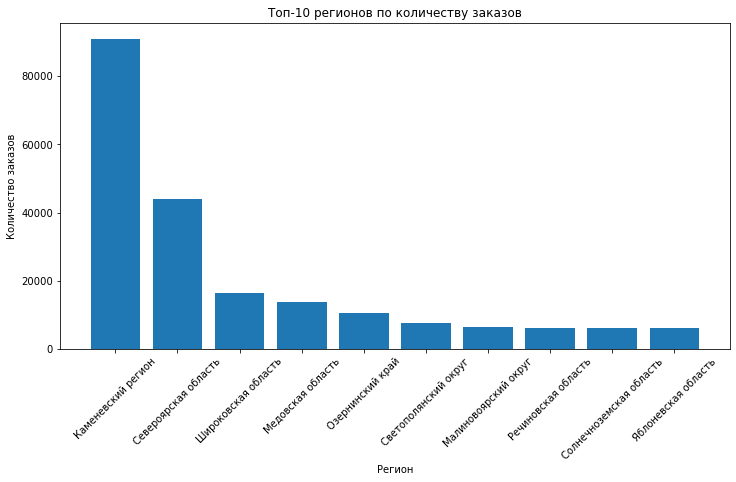

In [49]:
# Визуализируем топ-10 регионов по количеству заказов
top_regs = pivot_region.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_regs['region_name'], top_regs['orders_by_region'])

plt.title('Топ-10 регионов по количеству заказов')
plt.xlabel('Регион')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)

plt.show()

На графике еще более наглядно видно, насколько большой объем заказов в **Каменевском регионе** относительно остальных регионов.

In [50]:
# Посмотрим регионы с самым большим разнообразием мероприятий
event_types_by_region = df.groupby('region_name')['event_type_main'].nunique()
max_event_types = event_types_by_region.max()
regions_max = pd.Series(event_types_by_region[event_types_by_region == max_event_types].index)

print("Регионы с максимальным разнообразием мероприятий (за весь период были проведены все виды мероприятий): \n", regions_max)

Регионы с максимальным разнообразием мероприятий (за весь период были проведены все виды мероприятий): 
 0        Горицветская область
1         Горностепной регион
2            Зоринский регион
3          Каменевский регион
4           Медовская область
5            Озернинский край
6         Речиновская область
7        Светополянский округ
8        Североярская область
9        Серебринская область
10    Солнечноземская область
11       Тепляковская область
12           Травяная область
13        Широковская область
14        Яблоневская область
15       Ягодиновская область
Name: region_name, dtype: object


In [51]:
# Аналогичным образом сделаем сводную табицу по билетным операторам
orders_by_services = df.groupby('service_name')['order_id'].nunique().reset_index()
events_by_services = df.groupby('service_name')['event_id'].nunique().reset_index()
revenue_by_services = df.groupby('service_name')['revenue_rub'].sum().reset_index()

pivot_services = pd.DataFrame({
    'service_name': orders_by_services['service_name'],
    'orders_by_service': orders_by_services['order_id'],
    'events_by_service': events_by_services['event_id'],
    'revenue_by_service': round(revenue_by_services['revenue_rub'], 2)
})

pivot_services = pivot_services.sort_values(by='orders_by_service', ascending=False).reset_index(drop=True)
pivot_services.head(10)

,service_name,orders_by_service,events_by_service,revenue_by_service
0,Билеты без проблем,63506,4255,26701648.25
1,Лови билет!,41120,4882,17664987.01
2,Билеты в руки,40338,3538,13384830.94
3,Мой билет,34836,1308,23476852.33
4,Облачко,26642,2348,21644068.03
5,Лучшие билеты,17772,1762,2823437.42
6,Весь в билетах,16849,867,18049303.43
7,Прачечная,10273,1027,4900985.27
8,Край билетов,6207,253,6703958.74
9,Тебе билет!,5227,1062,3073663.87


### **Промежуточный вывод по регионам и партнёрам**

* **Явные лидеры среди регионов** присутствуют: **топ-5 регионов** аккумулируют **более 60% всех заказов**, а почти **треть всех заказов (31%)** и более **четверти всех событий (27%)** приходится на один регион — `**Каменевский регион**`, тогда как в ряде регионов зафиксировано **менее 20 заказов** за весь период.
* **Разнообразие мероприятий** (максимальное количество уникальных типов событий) наблюдается в 16 регионах, среди которых `Каменевский регион`, `Медовская область`, `Широковская` и `Яблоневская области`. Это говорит о развитой культурной инфраструктуре в этих регионах.
* **Среди билетных операторов** также есть явные лидеры: топ-3 партнёра (`"Билеты без проблем"`, `"Лови билет!"`, `"Билеты в руки"`) обеспечивают почти половину всех заказов и значительную часть выручки. Остальные операторы заметно уступают как по объёму заказов, так и по выручке.
* **Доля событий и заказов** у большинства регионов и партнёров невелика, что указывает на **высокую концентрацию рынка** вокруг нескольких ключевых игроков и регионов.

**Вывод:** рынок билетов и событий **сильно сконцентрирован**: небольшое число регионов и сервисов-партнеров формируют основную долю заказов и выручки, а большинство остальных категорий **имеют низкую активность**.

## **Задача 4. Статистический анализ данных**

## **Постановка задачи:**
Коллеги из продуктового отдела хотят отдельно проверить **несколько гипотез** относительно **активности пользователей мобильных и стационарных устройств**.  
**Проверим две гипотезы**, которые предполагают большую активность пользователей мобильных устройств:  

* Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств;
* Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.  
  
**Рекомендация заказчика:**
Перед проведением гипотез **изучите** сравниваемые **данные**, **обоснуйте выбор статистического теста**, укажите **формулировку нулевой и альтернативной гипотез**. **Результаты** тестов **прокомментируйте** в промежуточном выводе. Используйте данные только за осенний период.

Для начала **проверим распределения на нормальность**, чтобы выяснить, какой тест мы будем применять, чтобы выявить ту или иную разницу между группами. Тест проведем с помощью одновыборочного критерия **Колмогорова-Смирнова**.

In [52]:
# Количество заказов на одного пользователя по группам
orders_mobile = df_autumn[df_autumn['device_type_canonical'] == 'mobile'].groupby('user_id')['order_id'].nunique()
orders_desktop = df_autumn[df_autumn['device_type_canonical'] == 'desktop'].groupby('user_id')['order_id'].nunique()

print("Распределение количества заказов на пользователя (mobile):")
display(orders_mobile.describe())
print("\nРаспределение количества заказов на пользователя (desktop):")
display(orders_desktop.describe())

Распределение количества заказов на пользователя (mobile):


count    14239.000000
mean         9.514573
std         68.480080
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       4365.000000
Name: order_id, dtype: float64


Распределение количества заказов на пользователя (desktop):


count    4906.000000
mean        7.069303
std        36.174169
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      1510.000000
Name: order_id, dtype: float64

Судя по тому, что на одного пользователя в максимальных случаях приходится аж **1510** или даже **4365 заказов**, нужно ограничить данные 99, так как присутствуют конкретные выбросы.

In [53]:
orders_mobile  = orders_mobile[orders_mobile < orders_mobile.quantile(0.99)]
orders_desktop = orders_desktop[orders_desktop < orders_desktop.quantile(0.99)]

In [54]:
print("Распределение количества заказов на пользователя (mobile):")
display(orders_mobile.describe())
print("\nРаспределение количества заказов на пользователя (desktop):")
display(orders_desktop.describe())

Распределение количества заказов на пользователя (mobile):


count    14094.000000
mean         5.198028
std         10.485241
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        114.000000
Name: order_id, dtype: float64


Распределение количества заказов на пользователя (desktop):


count    4856.000000
mean        4.485379
std         9.396002
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       102.000000
Name: order_id, dtype: float64

## **Гипотезы:**
**H0:** Распределение статистически значимо не отличается от нормального, можно использовать критерий сравнения средних **t-Стьюдента**;  
**H1:** Распределение статистически значимо отличается от нормального, используем его непараметрический аналог - **тест U-Манна-Уитни**.

In [55]:
# Проверим распределения на нормальность с помощью теста K.S.
stat, p_value = st.kstest(orders_mobile, 'norm')

alpha = 0.05
if p_value < alpha:
    print(f"Распределение заказов на мобильных устройствах статистически значимо отличается от нормального (p-value = {p_value} < 0.05)")
else:
    print(f"Распределение заказов на мобильных устройствах статистически значимо не отличается от нормального (p-value = {p_value} >= 0.05)")

Распределение заказов на мобильных устройствах статистически значимо отличается от нормального (p-value = 0.0 < 0.05)


In [56]:
stat, p_value = st.kstest(orders_desktop, 'norm')

alpha = 0.05
if p_value < alpha:
    print(f"Распределение заказов на компьютерах статистически значимо отличается от нормального (p-value = {p_value} < 0.05)")
else:
    print(f"Распределение заказов на компьютерах статистически значимо не отличается от нормального (p-value = {p_value} >= 0.05)")

Распределение заказов на компьютерах статистически значимо отличается от нормального (p-value = 0.0 < 0.05)


Так как распределения по двум группам статистически значимо **отличаются от нормального**, применяем **тест U-Манна-Уитни**

## **Гипотезы:**
**H0:** Ранги мобильных и десктопных заказов по пользователям статистически значимо не отличаются друг от друга;  
**H1:** Ранги мобильных заказов по пользователям статистически значимо больше десктопных.

In [57]:
# Проведём тест Манна-Уитни для сравнения рангов заказов на пользователя между мобильными и десктопными устройствами
u_stat, p_value = st.mannwhitneyu(orders_mobile, orders_desktop, alternative='greater')
p_value = round(p_value, 4)

if p_value < alpha:
    print(f"p_value = {p_value} => ранги заказов на пользователя для мобильных устройств статистически значимо больше десктопных (отвергаем H0).")
else:
    print(f"p_value = {p_value} => нет статистически значимых различий между рангами заказов на пользователя для мобильных и десктопных устройств (не отвергаем H0).")

p_value = 0.0 => ранги заказов на пользователя для мобильных устройств статистически значимо больше десктопных (отвергаем H0).


Гипотеза подтвердилась! 

## Переходим ко второй проверке
### **Гипотеза**
Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.  


Для начала, как и в прошлый раз, проверяем данные на нормальность, но перед этим отфильтруем символические значения, которые ранее проставили для NaN

In [58]:
# Так как данные по людям с минусами значениями в столбце days_since_prev в тесте не участвуют (не было предыдущего заказа), то мы их отфильтруем
df_test = df_autumn[df_autumn['days_since_prev'] >= 0]

# Посмотрим на распределение времени между заказами на пользователя
time_mobile = df_test[df_test['device_type_canonical'] == 'mobile']['days_since_prev']
time_desktop = df_test[df_test['device_type_canonical'] == 'desktop']['days_since_prev']

print("Распределение времени между заказами на пользователя (mobile):")
display(time_mobile.describe())
print("\nРаспределение времени между заказами на пользователя (desktop):")
display(time_desktop.describe())

Распределение времени между заказами на пользователя (mobile):


count    128444.000000
mean          3.783205
std          13.382618
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         148.000000
Name: days_since_prev, dtype: float64


Распределение времени между заказами на пользователя (desktop):


count    33303.000000
mean         3.037985
std         12.118307
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        146.000000
Name: days_since_prev, dtype: float64

In [59]:
# Проверяем на нормальность с помощью теста Колмогорова-Смирнова
stat, p_value = st.kstest(time_mobile, 'norm')
alpha = 0.05

if p_value < alpha:
    print(f"Распределение времени между заказами на мобильных устройствах статистически значимо отличается от нормального (p-value = {p_value} < 0.05)")
else:
    print(f"Распределение времени между заказами на мобильных устройствах статистически значимо не отличается от нормального (p-value = {p_value} >= 0.05)")

Распределение времени между заказами на мобильных устройствах статистически значимо отличается от нормального (p-value = 0.0 < 0.05)


In [60]:
stat, p_value = st.kstest(time_desktop, 'norm')
alpha = 0.05

if p_value < alpha:
    print(f"Распределение времени между заказами на десктопах статистически значимо отличается от нормального (p-value = {p_value} < 0.05)")
else:
    print(f"Распределение времени между заказами на десктопах статистически значимо не отличается от нормального (p-value = {p_value} >= 0.05)")

Распределение времени между заказами на десктопах статистически значимо отличается от нормального (p-value = 0.0 < 0.05)


Так как распределение не нормальное, будем применять тест U-Манна-Уитни
## **Гипотезы:**
**H0:** Ранги количества дней между заказами у мобильных и десктопных пользователей статистически значимо не отличаются друг от друга;  
**H1:** Ранги мобильных заказов по времени заказа статистически значимо больше десктопных.

In [61]:
# Проведём тест Манна-Уитни для сравнения времени между заказами у мобильных и десктопных пользователей
u_stat, p_value = st.mannwhitneyu(time_mobile, time_desktop, alternative='greater')
p_value = round(p_value, 4)

if p_value < 0.05:
    print(f"p_value={p_value} => время между заказами у мобильных пользователей статистически значимо больше, чем у десктопных (отвергаем H0).")
else:
    print(f"p_value={p_value} => нет статистически значимых различий во времени между заказами у мобильных и десктопных пользователей (не отвергаем H0).")

p_value=0.0 => время между заказами у мобильных пользователей статистически значимо больше, чем у десктопных (отвергаем H0).


### **Промежуточный вывод:**
Гипотезы коллег подтвердились: **среднее количество заказов на одного пользователя и среднее время между заказами у пользователей мобильного приложения выше** по сравнению с пользователями компьютеров.  
Следовательно, **мобильные пользователи делают больше заказов и реже возвращаются за новыми билетами**, чем пользователи десктопа.

# **Обзор и выводы по проделанной работе**

* В процессе проекта анализировались **данные по заказам билетов и проведенным мероприятиям (ивентам)** за лето и осень (до ноября) 2024 года.  
Данные в процессе преобработки были объединены в один датафрейм, очищены от дубликатов и были заменены пропуски;
* Исходя из проанализированных распределений, наибольшей популярностью пользовались **театральные постановки** и **спортивные события**, особенно **осенью**. **Летом** выше **доля концертов**, **выставок** и **стендапов**.
* **Средний чек** на концерт **выше летом**, на **стендап — осенью**. В осенний период средняя стоимость билета снизилась в дни пиковых продаж;
Это может быть связано с определенными скидками, проведенными 3 сентября и 1 октября, однако четких данных на этот счет не имеется - можно лишь констатировать большой провал в **среднем чеке** в эти даты и пик метрики по **количеству проданных билетов**;
* **Осенью активность пользователей росла**, особенно по вторникам и пятницам. Наиболее низкими по активности днями же являются воскресения;
* **Мобильные пользователи делают больше заказов** и реже возвращаются за новыми билетами, чем пользователи компьютеров;
* **Рынок** билетов на мероприятия **сконцентрирован вокруг нескольких регионов**, в частности, **Каменевского**, и **операторов**: **"Билеты без проблем", "Лови билет!"**, которые приносят основную долю заказов и выручки.

# **Рекомендации:**
* **Стоит учитывать обратить внимание сезонные предпочтения зрителей**: летом делать акцент на концертах, выставках и стендапах, осенью — на театре и спорте.
* **Также важно направить ресурсы на сглаживание провалов в среднем чеке**. Например, сделать акции более распределенными по времени (несколько за сезон) и менее крупными, чтобы поддерживать высокий спрос, но не допускать провалов, как наблюдается 3 сентября и 1 октября.
* **Стоит сконцентрировать внимание** на **мобильном приложении**, так как **мобильные пользователи более активны**.
* **Можно также обратить внимание** на **регионы и партнеров, лидирующими по объему заказов**, однако важно **стимулировать развитие и менее активных регионов для расширения рынка**, так как их доля, в отличие от топ-3 регионов, значительно меньше, однако имеет большой потенциал.